<a href="https://colab.research.google.com/github/daveMitra/Helloku2Project/blob/master/DataVisualAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I - Setting up the Environment
We will set up the environment required for the project.
 - Mount the data in drive to notebook.
 - import libraries required for the project.

#### Importing packages

In [1]:
!pip install seaborn

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Mounting the Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# II - Exploratory Data Analysis
In this project we will try to perform Exploratory Data Analyisis using visualisation libraries of python.


In [5]:
df = pd.read_csv('/content/drive/My Drive/ThesisData/Voice_Asst_CSV.csv')

In [6]:
df.head()

,Gender,Age,VoiceAssistant,effectiveway,VAregularbasis,Commonpurpose,Otherpurposes,financialtransactions,frequency,Place,helpfulness,Satisfaction,Socialpresence,Enjoyable,Futureuse,Why do you prefer not using Voice Assistants?,Do you hesitate to share your personal information with a Voice Assistant?,Do you feel concerned to perform a financial transaction via Voice Assistants?,Do you feel the Voice Assistants are recording you?,Do you think Voice Assistants might help you with better communication with your Devices?,Do you plan to use Voice Assistant in the future?
0,Male,25 to 34,Google Assistant (Android),Yes,Yes,"Make Calls, Play Music, Send Messages, Get Wea...","Calendar Scheduling, Web searches, Send Emails...",Ask OPT,Twice a Day,"While driving, At home",7.0,Satisfied,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,25 to 34,Google Assistant (Android),No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Privacy concerns, Not like to use it",Yes,Yes,Yes,No,No
2,Female,25 to 34,Google Assistant (Android),Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privacy concerns,Yes,Yes,Yes,No,Maybe
3,Male,25 to 34,Alexa (Amazon echo),Yes,Yes,"Play Music, Get Weather, For Fun","GPS, Web searches",None,Multiple times in Day,At home,7.0,Neutral,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,21 to 24,Google Assistant (Android),Yes,Yes,"Open Applications, For Fun","Web searches, Ask Questions, Get News",None,Once in week,At home,8.0,Satisfied,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


#### Quick Data Check

- Above Table Shows a sample of Data.
- There are total 21 columns in our data set.
- We have 260 rows of Data

In [7]:
# ;et us check how many data points are available
column_names = list(df.columns)
column_names

['Gender',
 'Age',
 'VoiceAssistant',
 'effectiveway',
 'VAregularbasis',
 'Commonpurpose',
 'Otherpurposes',
 'financialtransactions',
 'frequency',
 'Place',
 ' helpfulness',
 'Satisfaction',
 'Socialpresence',
 'Enjoyable',
 'Futureuse',
 'Why do you prefer not using Voice Assistants?',
 'Do you hesitate to share your personal information with a Voice Assistant?',
 'Do you feel concerned to perform a financial transaction via Voice Assistants?',
 'Do you feel the Voice Assistants are recording you?',
 'Do you think Voice Assistants might help you with better communication with your Devices?',
 'Do you plan to use Voice Assistant in the future?']

# III - Analysis 1 - "Voice Assistance" : 

 We can prepare a Pie chart or Bar graph for the uses   (calls, mails, music, etc.) of the above Voice Assistance. We will be able to analyze the purposes for which Voice Assistance is used the most and the least.

We will have following analysis below

  - How many kinds of Voice Assistance platforms are there
  - 


In [8]:
def strip_whitespace(val):
    val = val.strip()
    val = val.replace('(', '')
    val = val.replace(')', '')
    return val

In [9]:
df['VoiceAssistant'] = df['VoiceAssistant'].apply(strip_whitespace)
# df["VoiceAssistant"]= df["VoiceAssistant"].astype(str)

In [10]:
df["VoiceAssistant"]

0      Google Assistant Android
1      Google Assistant Android
2      Google Assistant Android
3             Alexa Amazon echo
4      Google Assistant Android
                 ...           
255    Google Assistant Android
256                 Siri iPhone
257       Bixby Android Samsung
258                 Siri iPhone
259           Alexa Amazon echo
Name: VoiceAssistant, Length: 260, dtype: object

In [11]:
# import seaborn as sns
# # sns.set(style="darkgrid")


# surveydata = sns.load_dataset(df)

# ax = sns.countplot(x="VoiceAssistant", data=surveydata)

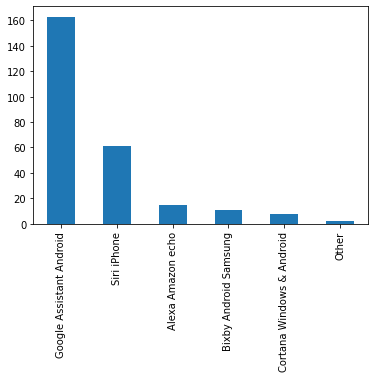

In [12]:
df['VoiceAssistant'].value_counts().plot(kind='bar')

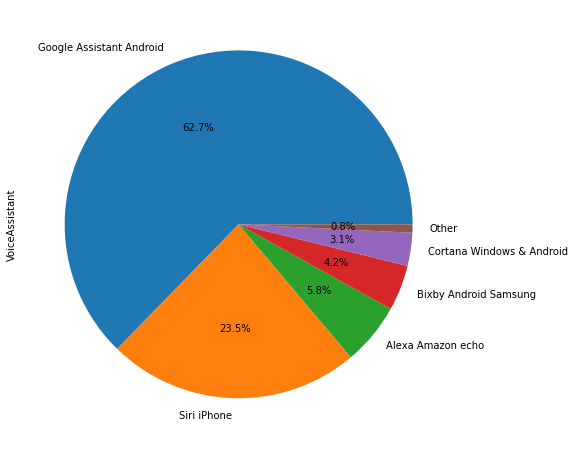

In [13]:
df['VoiceAssistant'].value_counts().plot(kind='pie', figsize=(10, 8),  autopct='%1.1f%%')

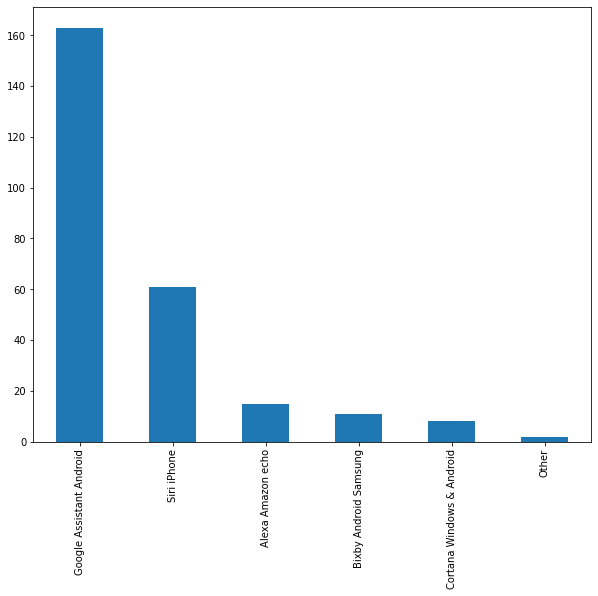

In [14]:
df['VoiceAssistant'].value_counts().plot(kind='bar', figsize=(10, 8))

In [15]:
# How Many

In [16]:
df_age_joy = df[['Age', 'Enjoyable']]

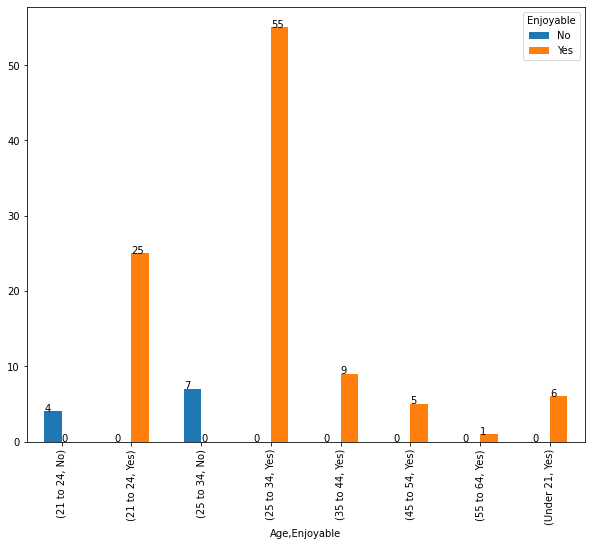

In [17]:
 df_sat_pivotej = df_age_joy.pivot_table(index=['Age','Enjoyable'], columns='Enjoyable', aggfunc='size', fill_value=0)
 ax = df_sat_pivotej.plot(kind='bar',  figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

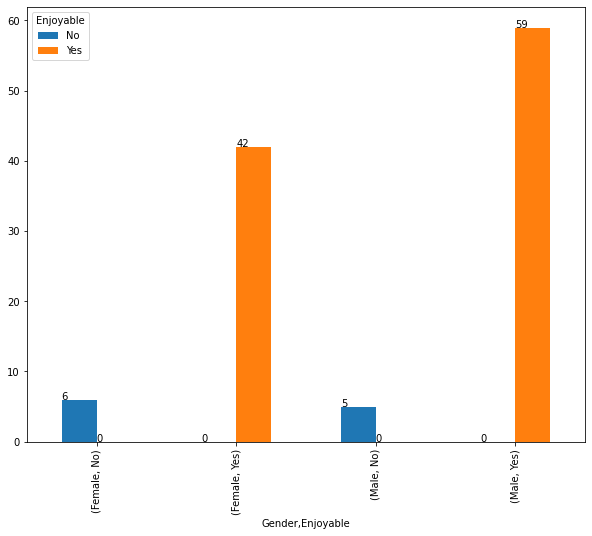

In [18]:
df_gen_enj = df[['Gender', 'Enjoyable']]
df_sat_pivoteenjgender =df_gen_enj.pivot_table(index=['Gender','Enjoyable'], columns='Enjoyable', aggfunc='size', fill_value=0)
ax = df_sat_pivoteenjgender.plot(kind='bar',  figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

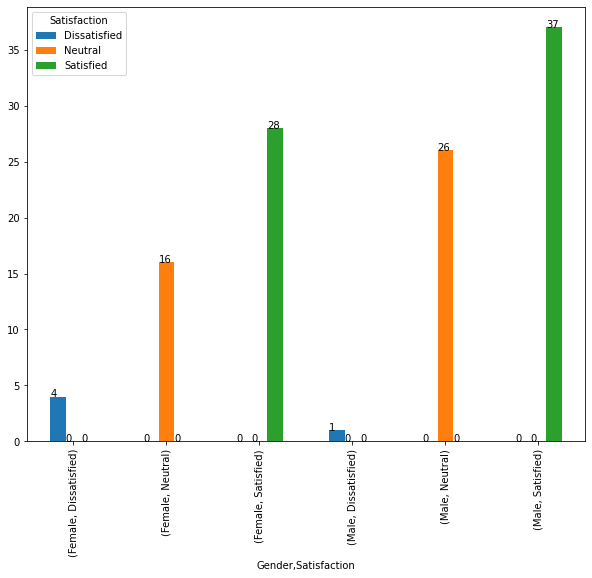

In [19]:
df_gen_enj = df[['Gender', 'Satisfaction']]
df_sat_pivoteenjgender =df_gen_enj.pivot_table(index=['Gender','Satisfaction'], columns='Satisfaction', aggfunc='size', fill_value=0)
ax = df_sat_pivoteenjgender.plot(kind='bar',  figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

# IV - Satisfaction Rate per Age Group

- Satisfaction rate corresponding to age.
(Based on the answer provided for this question - How satisfied are you with Voice Assistants?) 


In [20]:
df_satisfaction_age = df[['Age', 'Satisfaction']]
df_satisfaction_age


,Age,Satisfaction
0,25 to 34,Satisfied
1,25 to 34,NaN
2,25 to 34,NaN
3,25 to 34,Neutral
4,21 to 24,Satisfied
...,...,...
255,21 to 24,Satisfied
256,25 to 34,Satisfied
257,25 to 34,NaN
258,55 to 64,NaN


In [34]:
 df_sat_pivot = df_satisfaction_age.pivot_table(index=['Age','Satisfaction'], columns='Satisfaction', aggfunc='size', fill_value=0)

 df_sat_pivot.head()

Satisfaction           Dissatisfied  Neutral  Satisfied
Age      Satisfaction                                  
21 to 24 Dissatisfied             3        0          0
         Neutral                  0       10          0
         Satisfied                0        0         16
25 to 34 Dissatisfied             2        0          0
         Neutral                  0       23          0

ax = df_sat_pivot.plot(kind='bar',  figsize=(10, 8))
for p in ax.patches:[link text](https://)
    ax.annotate(str(p.get_height()))

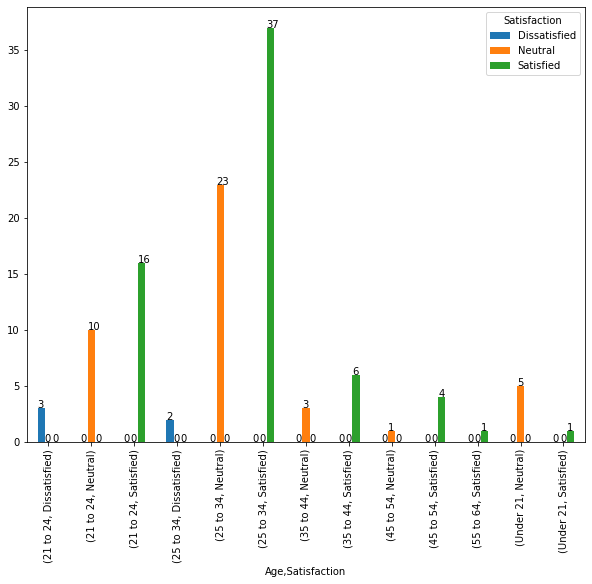

In [39]:
ax = df_sat_pivot.plot(kind='bar',  figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

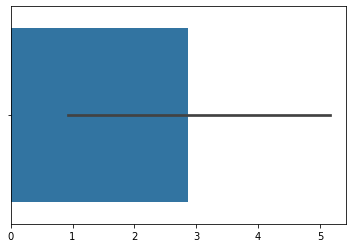

In [41]:
import seaborn as sns
sns.barplot(df_sat_pivot)


# ax = df_sat_pivot.plot(kind='bar',  figsize=(10, 8))
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

# age , helpfullness 

In [25]:
df_age_help = df[['helpfulness', 'Age']]
df.set_index('helpfulness', inplace=True)
grouped = df.groupby('Age')
fig, ax = plt.subplots()
for label, df2 in grouped:
    ax.plot(df2['Age'], label=label+' Age')
    ax.plot(df2['helpfulness'], label=label+' helpfulness')
plt.xticks(rotation=30)
plt.xlabel(df.index.name)
plt.legend()

KeyError: ignored

# Average Helpfulness rating per age group

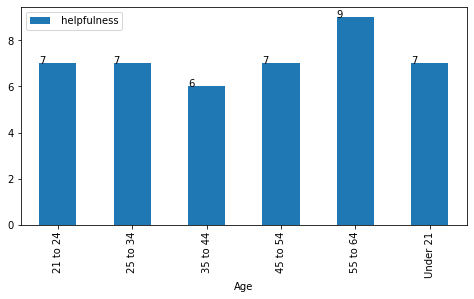

In [26]:
df_age_help = df[['Age', ' helpfulness']]
grouped = df.groupby('Age').mean().astype(int).plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4'],figsize=(8, 4))
for p in grouped.patches:
    grouped.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

In [27]:
df.columns.to_list()


['Gender',
 'Age',
 'VoiceAssistant',
 'effectiveway',
 'VAregularbasis',
 'Commonpurpose',
 'Otherpurposes',
 'financialtransactions',
 'frequency',
 'Place',
 ' helpfulness',
 'Satisfaction',
 'Socialpresence',
 'Enjoyable',
 'Futureuse',
 'Why do you prefer not using Voice Assistants?',
 'Do you hesitate to share your personal information with a Voice Assistant?',
 'Do you feel concerned to perform a financial transaction via Voice Assistants?',
 'Do you feel the Voice Assistants are recording you?',
 'Do you think Voice Assistants might help you with better communication with your Devices?',
 'Do you plan to use Voice Assistant in the future?']

In [28]:
grouped

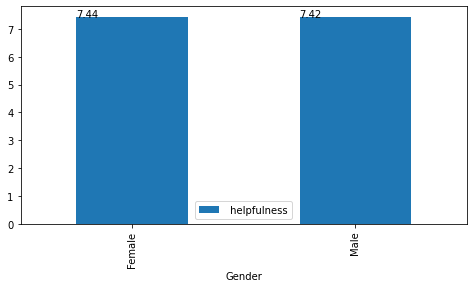

In [29]:
df_age_help = df[['Gender', ' helpfulness']]
grouped = df.groupby('Gender').mean().round(2).plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4'],figsize=(8, 4))
for p in grouped.patches:
    grouped.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))